In [ ]:
## need to install the following libraries
## pip3 install imutils tensorflow keras opencv-python ipynb pandas

In [30]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split

## Get the data

In [31]:
#Get the data
classes = 10 
images = []
labels = [] 

for i in range(0, classes):
    imgList = os.listdir('Data/'+str(i))
    for j in imgList:
        currentImg = cv2.imread('Data/'+str(i)+'/'+str(j))
        currentImg = cv2.resize(currentImg, (28, 28))
        images.append(currentImg)
        labels.append(i)
        
print(len(images))
print(len(labels))

10160
10160


In [32]:
images = np.array(images)
labels = np.array(labels)
print(images.shape)
print(labels.shape)

(10160, 28, 28, 3)
(10160,)


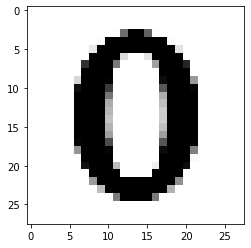

In [25]:
plt.imshow(images[10])

## Split the data into Train, Test and Validation Sets

In [33]:

train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2)
print(train_images.shape)
print(test_images.shape)

(8128, 28, 28, 3)
(2032, 28, 28, 3)


In [34]:

train_images,  val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2)
print(train_images.shape)
print(val_images.shape)

(6502, 28, 28, 3)
(1626, 28, 28, 3)


## Preprocessing the data

In [35]:
def preProcess(img):
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img=cv2.equalizeHist(img)
    x,img=cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    img=img/255
    return img

train_images = np.array(list(map(preProcess, train_images)))
test_images = np.array(list(map(preProcess, test_images)))
val_images = np.array(list(map(preProcess, val_images)))

In [36]:
print(train_images.shape)
print(test_images.shape)
print(val_images.shape)

(6502, 28, 28)
(2032, 28, 28)
(1626, 28, 28)


In [37]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
val_images = val_images.reshape(val_images.shape[0], 28, 28, 1)

In [38]:
print(train_images.shape)
print(test_images.shape)
print(val_images.shape)

(6502, 28, 28, 1)
(2032, 28, 28, 1)
(1626, 28, 28, 1)


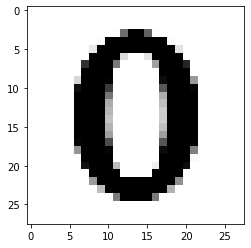

In [13]:
plt.imshow(images[10])

## Defining Callback

In [39]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.997):
            print("\nReached 99.5% accuracy so cancelling training!")
            self.model.stop_training = True

## Creating CNN Model

In [40]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), input_shape=(28, 28, 1),  activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Conv2D(64, (3,3),  activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Conv2D(64, (3,3),  activation="relu"),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation="relu"),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [41]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)         

## Image Augmentation

In [42]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10)

## Training the model

In [18]:
## enhanced data set to have zoom,shear, shit distrotions on the MNIST dataset
callbacks = myCallback()
history = model.fit(datagen.flow(train_images, train_labels),
                              epochs = 30, validation_data = (val_images, val_labels), callbacks = [callbacks])

Epoch 1/30
204/204 [==============================] - 3s 14ms/step - loss: 2.0089 - accuracy: 0.2618 - val_loss: 0.6402 - val_accuracy: 0.8801
Epoch 2/30
204/204 [==============================] - 3s 14ms/step - loss: 0.8794 - accuracy: 0.7041 - val_loss: 0.1577 - val_accuracy: 0.9508
Epoch 3/30
204/204 [==============================] - 3s 13ms/step - loss: 0.5287 - accuracy: 0.8327 - val_loss: 0.1259 - val_accuracy: 0.9490
Epoch 4/30
204/204 [==============================] - 3s 13ms/step - loss: 0.3722 - accuracy: 0.8842 - val_loss: 0.0626 - val_accuracy: 0.9803
Epoch 5/30
204/204 [==============================] - 3s 14ms/step - loss: 0.3030 - accuracy: 0.9094 - val_loss: 0.0524 - val_accuracy: 0.9865
Epoch 6/30
204/204 [==============================] - 3s 13ms/step - loss: 0.2541 - accuracy: 0.9209 - val_loss: 0.0455 - val_accuracy: 0.9852
Epoch 7/30
204/204 [==============================] - 3s 14ms/step - loss: 0.2349 - accuracy: 0.9285 - val_loss: 0.0394 - val_accuracy: 0.9865

In [45]:
## For Non enhanced MNIST
## the enhanced one failed for Sudoku images as lot of wrong predicitons.
callbacks = myCallback()
history = model.fit(train_images, train_labels,
                              epochs = 30, validation_data = (val_images, val_labels), callbacks = [callbacks])

Epoch 1/30
204/204 [==============================] - 3s 13ms/step - loss: 0.0530 - accuracy: 0.9822 - val_loss: 0.0183 - val_accuracy: 0.9951
Epoch 2/30
204/204 [==============================] - 3s 13ms/step - loss: 0.0392 - accuracy: 0.9880 - val_loss: 0.0242 - val_accuracy: 0.9926
Epoch 3/30
204/204 [==============================] - 3s 14ms/step - loss: 0.0391 - accuracy: 0.9882 - val_loss: 0.0221 - val_accuracy: 0.9932
Epoch 4/30
204/204 [==============================] - 3s 14ms/step - loss: 0.0345 - accuracy: 0.9883 - val_loss: 0.0184 - val_accuracy: 0.9945
Epoch 5/30
204/204 [==============================] - 3s 14ms/step - loss: 0.0338 - accuracy: 0.9883 - val_loss: 0.0141 - val_accuracy: 0.9963
Epoch 6/30
204/204 [==============================] - 3s 14ms/step - loss: 0.0304 - accuracy: 0.9894 - val_loss: 0.0163 - val_accuracy: 0.9938
Epoch 7/30
204/204 [==============================] - 3s 14ms/step - loss: 0.0337 - accuracy: 0.9892 - val_loss: 0.0120 - val_accuracy: 0.9963

### Plotting Graphs

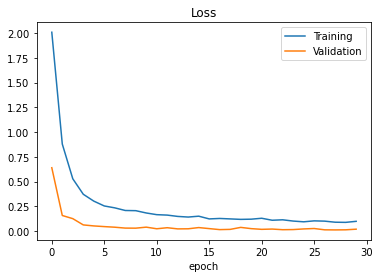

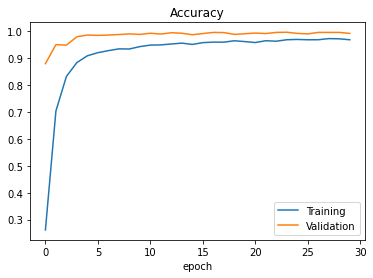

In [19]:
# for Enhanced MNIST Dataset
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title('Loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training','Validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()

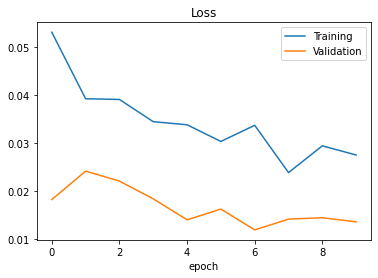

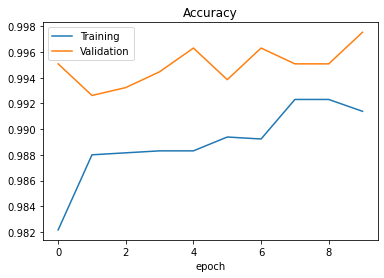

In [46]:
# for normal MNIST Dataset
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title('Loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training','Validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()

### Evaluating the model on Test set

In [20]:
## enhanced MNIST dataset

score = model.evaluate(test_images, test_labels, verbose=1)
print('Test Score : ', score[0])
print('Test Accuracy : ', score[1])

64/64 [==============================] - 0s 2ms/step - loss: 0.0202 - accuracy: 0.9946
Test Score :  0.020159898325800896
Test Accuracy :  0.9945865869522095


In [47]:
# normal MNIST Data 

score = model.evaluate(test_images, test_labels, verbose=1)
print('Test Score : ', score[0])
print('Test Accuracy : ', score[1])

64/64 [==============================] - 0s 2ms/step - loss: 0.0111 - accuracy: 0.9966
Test Score :  0.011131134815514088
Test Accuracy :  0.9965550899505615


### Saving the model

In [21]:
# enhanced MNIST dataset
model.save("SudoVision_RT.h5")

In [48]:
# normal MNIST dataset
model.save("SudoVision_RT_mnist.h5")